# 앙상블(Ensemble)

* 일반화와 강건성(Robustness)을 향상시키기 위해 여러 모델의 예측 값을 결합하는 방법

* 앙상블에는 크게 두가지 종류가 존재

  * 평균 방법
    * 여러개의 추정값을 독립적으로 구한뒤 평균을 취함
    * 결합 추정값은 분산이 줄어들기 때문에 단일 추정값보다 좋은 성능을 보임
    
  * 부스팅 방법
    * 순차적으로 모델 생성
    * 결합된 모델의 편향을 감소 시키기 위해 노력
    * 부스팅 방법의 목표는 여러개의 약한 모델들을 결합해 하나의 강력한 앙상블 모델을 구축하는 것

## Bagging meta-estimator

* bagging은 `b`ootstrap `agg`regat`ing`의 줄임말
* 원래 훈련 데이터셋의 일부를 사용해 여러 모델을 훈련
* 각각의 결과를 결합해 최종 결과를 생성
* 분산을 줄이고 과적합을 막음
* 강력하고 복잡한 모델에서 잘 동작

In [1]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer, load_boston, load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

In [2]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

### Bagging을 사용한 분류

#### 데이터셋 불러오기

In [4]:
iris = load_iris()
wine = load_wine()
cancer = load_breast_cancer()

#### KNN

##### 붓꽃 데이터

In [5]:
base_model = make_pipeline(
                           StandardScaler(), 
                           KNeighborsClassifier())

bagging_model = BaggingClassifier(base_model, n_estimators=10, 
                                  max_samples=0.5, max_features=0.5)

In [6]:
cross_val = cross_validate(
                           estimator = base_model,
                           X=iris.data, y=iris.target,
                           cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.0011983871459960937 (+/- 0.0004001393893773984)
avg score time: 0.002001333236694336 (+/- 2.2487308735945886e-06)
avg test score: 0.96 (+/- 0.024944382578492935)


In [7]:
cross_val = cross_validate(
                           estimator = bagging_model,
                           X=iris.data, y=iris.target,
                           cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.017406225204467773 (+/- 0.0027250512764943956)
avg score time: 0.005798959732055664 (+/- 0.0011634773953896882)
avg test score: 0.9399999999999998 (+/- 0.038873012632301994)


##### 와인 데이터

In [8]:
base_model = make_pipeline(
                           StandardScaler(), 
                           KNeighborsClassifier())

bagging_model = BaggingClassifier(base_model, n_estimators=10, 
                                  max_samples=0.5, max_features=0.5)

In [9]:
cross_val = cross_validate(
                           estimator = base_model,
                           X=wine.data, y=wine.target,
                           cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.000998687744140625 (+/- 2.574037471058994e-06)
avg score time: 0.0016004562377929688 (+/- 0.0004897456635623499)
avg test score: 0.9493650793650794 (+/- 0.037910929811115976)


In [10]:
cross_val = cross_validate(
                           estimator = bagging_model,
                           X=wine.data, y=wine.target,
                           cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.016605901718139648 (+/- 0.002055220339968779)
avg score time: 0.006198883056640625 (+/- 0.0011716338344273341)
avg test score: 0.9776190476190475 (+/- 0.020831783767013237)


##### 유방암 데이터

In [11]:
base_model = make_pipeline(
                           StandardScaler(), 
                           KNeighborsClassifier())

bagging_model = BaggingClassifier(base_model, n_estimators=10, 
                                  max_samples=0.5, max_features=0.5)

In [12]:
cross_val = cross_validate(
                           estimator = base_model,
                           X=cancer.data, y=cancer.target,
                           cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.0020020008087158203 (+/- 5.026053654881042e-06)
avg score time: 0.005004310607910156 (+/- 6.2456567115909355e-06)
avg test score: 0.9648501785437045 (+/- 0.009609970350036127)


In [13]:
cross_val = cross_validate(
                           estimator = bagging_model,
                           X=cancer.data, y=cancer.target,
                           cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.02220458984375 (+/- 0.0007482145645086591)
avg score time: 0.012802743911743164 (+/- 0.0009786255821306244)
avg test score: 0.9560937742586555 (+/- 0.009524206718929845)


#### SVC

##### 붓꽃 데이터

In [14]:
base_model = make_pipeline(
                           StandardScaler(), 
                           SVC())

bagging_model = BaggingClassifier(base_model, n_estimators=10, 
                                  max_samples=0.5, max_features=0.5)

In [15]:
cross_val = cross_validate(
                           estimator = base_model,
                           X=iris.data, y=iris.target,
                           cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.0011992931365966796 (+/- 0.0003993280290219299)
avg score time: 0.0006002426147460937 (+/- 0.0004900965298008853)
avg test score: 0.9666666666666666 (+/- 0.02108185106778919)


In [16]:
cross_val = cross_validate(
                           estimator = bagging_model,
                           X=iris.data, y=iris.target,
                           cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.026404047012329103 (+/- 0.004318264720630896)
avg score time: 0.002200746536254883 (+/- 0.00040023344982054724)
avg test score: 0.9400000000000001 (+/- 0.024944382578492935)


##### 와인 데이터

In [17]:
base_model = make_pipeline(
                           StandardScaler(), 
                           SVC())

bagging_model = BaggingClassifier(base_model, n_estimators=10, 
                                  max_samples=0.5, max_features=0.5)

In [18]:
cross_val = cross_validate(
                           estimator = base_model,
                           X=wine.data, y=wine.target,
                           cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.001601409912109375 (+/- 0.0004910123616224068)
avg score time: 0.00039987564086914064 (+/- 0.0004897456403489048)
avg test score: 0.9833333333333334 (+/- 0.022222222222222233)


In [19]:
cross_val = cross_validate(
                           estimator = bagging_model,
                           X=wine.data, y=wine.target,
                           cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.02440471649169922 (+/- 0.0022401791493801035)
avg score time: 0.0022020339965820312 (+/- 0.0004011416506022901)
avg test score: 0.9441269841269841 (+/- 0.030140345273442355)


##### 유방암 데이터

In [20]:
base_model = make_pipeline(
                           StandardScaler(), 
                           SVC())

bagging_model = BaggingClassifier(base_model, n_estimators=10, 
                                  max_samples=0.5, max_features=0.5)

In [21]:
cross_val = cross_validate(
                           estimator = base_model,
                           X=cancer.data, y=cancer.target,
                           cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.0029979705810546874 (+/- 3.350099195528087e-06)
avg score time: 0.0008003711700439453 (+/- 0.00040018562408369803)
avg test score: 0.9736376339077782 (+/- 0.014678541667933545)


In [22]:
cross_val = cross_validate(
                           estimator = bagging_model,
                           X=cancer.data, y=cancer.target,
                           cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.029007530212402342 (+/- 0.0012595539094302876)
avg score time: 0.004798984527587891 (+/- 0.0003975046971562702)
avg test score: 0.9718987734823784 (+/- 0.010197927908313182)


#### Decision Tree

##### 붓꽃 데이터

In [23]:
base_model = make_pipeline(
                           StandardScaler(), 
                           DecisionTreeClassifier())

bagging_model = BaggingClassifier(base_model, n_estimators=10, 
                                  max_samples=0.5, max_features=0.5)

In [24]:
cross_val = cross_validate(
                           estimator = base_model,
                           X=iris.data, y=iris.target,
                           cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.0007962703704833985 (+/- 0.00039816483476252143)
avg score time: 0.0006024360656738282 (+/- 0.0004918920802537445)
avg test score: 0.9666666666666668 (+/- 0.036514837167011066)


In [25]:
cross_val = cross_validate(
                           estimator = bagging_model,
                           X=iris.data, y=iris.target,
                           cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.022204828262329102 (+/- 0.002482561864724692)
avg score time: 0.0018004417419433595 (+/- 0.0003994231970350664)
avg test score: 0.9533333333333334 (+/- 0.03399346342395189)


##### 와인 데이터

In [26]:
base_model = make_pipeline(
                           StandardScaler(), 
                           DecisionTreeClassifier())

bagging_model = BaggingClassifier(base_model, n_estimators=10, 
                                  max_samples=0.5, max_features=0.5)

In [27]:
cross_val = cross_validate(
                           estimator = base_model,
                           X=wine.data, y=wine.target,
                           cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.0014005661010742187 (+/- 0.0004938531476209102)
avg score time: 0.00020036697387695312 (+/- 0.00040073394775390624)
avg test score: 0.8765079365079365 (+/- 0.04147871440938323)


In [28]:
cross_val = cross_validate(
                           estimator = bagging_model,
                           X=wine.data, y=wine.target,
                           cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.02300434112548828 (+/- 0.002097170855609472)
avg score time: 0.002000713348388672 (+/- 2.015165959273857e-06)
avg test score: 0.9441269841269841 (+/- 0.058270617403694186)


##### 유방암 데이터

In [29]:
base_model = make_pipeline(
                           StandardScaler(), 
                           DecisionTreeClassifier())

bagging_model = BaggingClassifier(base_model, n_estimators=10, 
                                  max_samples=0.5, max_features=0.5)

In [30]:
cross_val = cross_validate(
                           estimator = base_model,
                           X=cancer.data, y=cancer.target,
                           cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.005400466918945313 (+/- 0.0004903298296992469)
avg score time: 0.0006003856658935546 (+/- 0.0004902128434401034)
avg test score: 0.9191429902189101 (+/- 0.012980001008856656)


In [31]:
cross_val = cross_validate(
                           estimator = bagging_model,
                           X=cancer.data, y=cancer.target,
                           cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.026008462905883788 (+/- 0.0010980772892153854)
avg score time: 0.0020001888275146484 (+/- 1.0070186654063642e-06)
avg test score: 0.9630957925787922 (+/- 0.011628577273852681)


### Bagging을 사용한 회귀

#### 데이터셋 불러오기

In [32]:
boston = load_boston()
diabetes = load_diabetes()

#### KNN

##### 보스턴 주택 가격 데이터

In [33]:
base_model = make_pipeline(
                           StandardScaler(), 
                           KNeighborsRegressor())

bagging_model = BaggingRegressor(base_model, n_estimators=10, 
                                  max_samples=0.5, max_features=0.5)

In [34]:
cross_val = cross_validate(
                           estimator = base_model,
                           X=boston.data, y=boston.target,
                           cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.001600170135498047 (+/- 0.0004898057409145023)
avg score time: 0.0013999462127685547 (+/- 0.0004898239098330322)
avg test score: 0.47357748833823543 (+/- 0.13243123464477455)


In [35]:
cross_val = cross_validate(
                           estimator = bagging_model,
                           X=boston.data, y=boston.target,
                           cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.018611335754394533 (+/- 0.001018391251820609)
avg score time: 0.007596302032470703 (+/- 0.0010134138735546363)
avg test score: 0.5026062039159017 (+/- 0.12972957487819425)


##### 당뇨병 데이터

In [36]:
base_model = make_pipeline(
                           StandardScaler(), 
                           KNeighborsRegressor())

bagging_model = BaggingRegressor(base_model, n_estimators=10, 
                                  max_samples=0.5, max_features=0.5)

In [37]:
cross_val = cross_validate(
                           estimator = base_model,
                           X=diabetes.data, y=diabetes.target,
                           cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.0018001079559326171 (+/- 0.0004015220987554695)
avg score time: 0.0014002799987792968 (+/- 0.000491401488221735)
avg test score: 0.3689720650295623 (+/- 0.044659049060165365)


In [38]:
cross_val = cross_validate(
                           estimator = bagging_model,
                           X=diabetes.data, y=diabetes.target,
                           cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.016404104232788087 (+/- 0.002059246204746839)
avg score time: 0.006005716323852539 (+/- 0.0006332019606485306)
avg test score: 0.39697357650769777 (+/- 0.09090522346511469)


#### SVR

##### 보스턴 주택 가격 데이터

In [39]:
base_model = make_pipeline(
                           StandardScaler(), 
                           SVR())

bagging_model = BaggingRegressor(base_model, n_estimators=10, 
                                  max_samples=0.5, max_features=0.5)

In [40]:
cross_val = cross_validate(
                           estimator = base_model,
                           X=boston.data, y=boston.target,
                           cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.006000232696533203 (+/- 0.0006320336393186297)
avg score time: 0.0010010719299316407 (+/- 5.091227651611e-07)
avg test score: 0.17631266230186618 (+/- 0.5224914915128981)


In [41]:
cross_val = cross_validate(
                           estimator = bagging_model,
                           X=boston.data, y=boston.target,
                           cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.028806161880493165 (+/- 0.001165723766525542)
avg score time: 0.004204797744750977 (+/- 0.00039830688769134607)
avg test score: 0.19490556234832762 (+/- 0.30318999294007354)


##### 당뇨병 데이터

In [42]:
base_model = make_pipeline(
                           StandardScaler(), 
                           SVR())

bagging_model = BaggingRegressor(base_model, n_estimators=10, 
                                  max_samples=0.5, max_features=0.5)

In [43]:
cross_val = cross_validate(
                           estimator = base_model,
                           X=diabetes.data, y=diabetes.target,
                           cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.004599618911743164 (+/- 0.0004909916850587147)
avg score time: 0.0010016918182373046 (+/- 1.3453231792131315e-06)
avg test score: 0.14659936199629434 (+/- 0.02190798003342928)


In [44]:
cross_val = cross_validate(
                           estimator = bagging_model,
                           X=diabetes.data, y=diabetes.target,
                           cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.026807355880737304 (+/- 0.0017208141515219738)
avg score time: 0.004802131652832031 (+/- 0.0016001965802892191)
avg test score: 0.0638235706178835 (+/- 0.027168280982619645)


#### Decision Tree

##### 보스턴 주택 가격 데이터

In [45]:
base_model = make_pipeline(
                           StandardScaler(), 
                           DecisionTreeRegressor())

bagging_model = BaggingRegressor(base_model, n_estimators=10, 
                                  max_samples=0.5, max_features=0.5)

In [46]:
cross_val = cross_validate(
                           estimator = base_model,
                           X=boston.data, y=boston.target,
                           cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.0035983562469482423 (+/- 0.0004897561605694511)
avg score time: 0.00019998550415039061 (+/- 0.00039997100830078123)
avg test score: 0.050231118883933945 (+/- 0.9582170949013568)


In [47]:
cross_val = cross_validate(
                           estimator = bagging_model,
                           X=boston.data, y=boston.target,
                           cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.027204418182373048 (+/- 0.0013239438662903495)
avg score time: 0.002003383636474609 (+/- 6.666176649971502e-06)
avg test score: 0.4270760607700813 (+/- 0.3417754878798763)


##### 당뇨병 데이터

In [48]:
base_model = make_pipeline(
                           StandardScaler(), 
                           DecisionTreeRegressor())

bagging_model = BaggingRegressor(base_model, n_estimators=10, 
                                  max_samples=0.5, max_features=0.5)

In [49]:
cross_val = cross_validate(
                           estimator = base_model,
                           X=diabetes.data, y=diabetes.target,
                           cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.0028009414672851562 (+/- 0.0007481371236764885)
avg score time: 0.00039973258972167967 (+/- 0.0004895705843256397)
avg test score: -0.14576371722953368 (+/- 0.1710148597336601)


In [50]:
cross_val = cross_validate(
                           estimator = bagging_model,
                           X=diabetes.data, y=diabetes.target,
                           cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.023006677627563477 (+/- 0.0012625583664333014)
avg score time: 0.001401662826538086 (+/- 0.0004886238099776554)
avg test score: 0.34191470986135125 (+/- 0.019050248739924357)


## Forests of randomized trees

* `sklearn.ensemble` 모듈에는 무작위 결정 트리를 기반으로하는 두 개의 평균화 알고리즘이 존재
  * Random Forest
  * Extra-Trees
* 모델 구성에 임의성을 추가해 다양한 모델 집합이 생성
* 앙상블 모델의 예측은 각 모델의 평균

In [51]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

### Random Forests 분류

In [52]:
model = make_pipeline(\
                      StandardScaler(),
                      RandomForestClassifier()
                     )

In [53]:
cross_val = cross_validate(
                           estimator = model,
                           X=iris.data, y=iris.target,
                           cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.10062193870544434 (+/- 0.006409688058554963)
avg score time: 0.005999279022216797 (+/- 0.0010983338007061044)
avg test score: 0.96 (+/- 0.024944382578492935)


In [54]:
cross_val = cross_validate(
                           estimator = model,
                           X=wine.data, y=wine.target,
                           cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.100620698928833 (+/- 0.006796992406072692)
avg score time: 0.005803871154785156 (+/- 0.00040356614761694883)
avg test score: 0.9609523809523811 (+/- 0.028267341226138717)


In [55]:
cross_val = cross_validate(
                           estimator = model,
                           X=cancer.data, y=cancer.target,
                           cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.14043493270874025 (+/- 0.008697112479045558)
avg score time: 0.006400537490844726 (+/- 0.0004894517163545173)
avg test score: 0.9613258810743673 (+/- 0.016295338833238505)


### Random Forests 회귀

In [56]:
model = make_pipeline(\
                      StandardScaler(),
                      RandomForestRegressor()
                     )

In [57]:
cross_val = cross_validate(
                           estimator = model,
                           X=boston.data, y=boston.target,
                           cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.21805095672607422 (+/- 0.010028077868321723)
avg score time: 0.005800485610961914 (+/- 0.0004036454005184596)
avg test score: 0.6275104998774921 (+/- 0.19714313630154448)


In [58]:
cross_val = cross_validate(
                           estimator = model,
                           X=diabetes.data, y=diabetes.target,
                           cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.1778395652770996 (+/- 0.007143603170944707)
avg score time: 0.007201766967773438 (+/- 0.0024007082192654128)
avg test score: 0.4174461827288374 (+/- 0.04277236779299944)


### Extremely Randomized Trees 분류

In [59]:
model = make_pipeline(\
                      StandardScaler(),
                      ExtraTreesClassifier()
                     )

In [60]:
cross_val = cross_validate(
                           estimator = model,
                           X=iris.data, y=iris.target,
                           cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.06781697273254395 (+/- 0.0021459445509214026)
avg score time: 0.006599807739257812 (+/- 0.0004929335944639213)
avg test score: 0.9533333333333334 (+/- 0.03399346342395189)


In [61]:
cross_val = cross_validate(
                           estimator = model,
                           X=wine.data, y=wine.target,
                           cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.0700148105621338 (+/- 0.001892983729910108)
avg score time: 0.005801773071289063 (+/- 0.0004005982327138575)
avg test score: 0.9776190476190475 (+/- 0.020831783767013237)


In [62]:
cross_val = cross_validate(
                           estimator = model,
                           X=cancer.data, y=cancer.target,
                           cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.08141484260559081 (+/- 0.002236621739410266)
avg score time: 0.007002639770507813 (+/- 0.0006384843565615414)
avg test score: 0.9648657040832169 (+/- 0.017520803499130506)


### Extremely Randomized Trees 회귀

In [63]:
model = make_pipeline(\
                      StandardScaler(),
                      ExtraTreesRegressor()
                     )

In [64]:
cross_val = cross_validate(
                           estimator = model,
                           X=boston.data, y=boston.target,
                           cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.14543018341064454 (+/- 0.006614705352328584)
avg score time: 0.006201839447021485 (+/- 0.00039942396552865625)
avg test score: 0.6150852150233315 (+/- 0.2669339437597721)


In [65]:
cross_val = cross_validate(
                           estimator = model,
                           X=diabetes.data, y=diabetes.target,
                           cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.12383122444152832 (+/- 0.007352608014409534)
avg score time: 0.005999088287353516 (+/- 2.4731259307651404e-06)
avg test score: 0.4360326971545305 (+/- 0.035151333499609805)


### Random Forest, Extra Tree 시각화

* 결정 트리, Random Forest, Extra Tree의 결정 경계와 회귀식 시각화

In [66]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier

In [67]:
n_classes = 3
n_estimators = 30
cmap = plt.cm.RdYlBu
plot_step = 0.02
plot_step_coarser = 0.5
Random_seed = 13

In [68]:
iris = load_iris()
plot_idx = 1
models = [DecisionTreeClassifier(max_depth=None),
          RandomForestClassifier(n_estimators=n_estimators),
          ExtraTreesClassifier(n_estimators=n_estimators)]

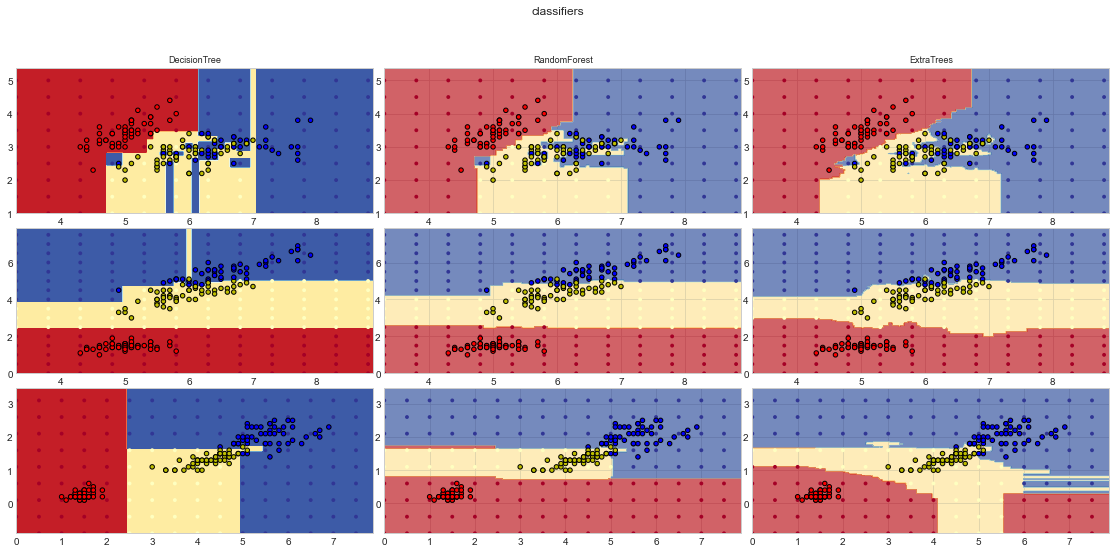

In [69]:
plt.figure(figsize=(16, 8))
plot_idx = 1
for pair in ([0, 1], [0, 2], [2, 3]):
    
    for model in models:
        
        X = iris.data[:, pair]
        y = iris.target
        
        
        idx = np.arange(X.shape[0])
        np.random.seed(Random_seed)
        np.random.shuffle(idx)
        
        X = X[idx]
        y = y[idx]
        
        model.fit(X, y)
        
        model_title = str(type(model)).split(".")[-1][:-2][:-len("Classifier")]
        
        plt.subplot(3, 3, plot_idx)
        if plot_idx <= len(models):
            plt.title(model_title, fontsize=9)
            
        x_min, x_max = X[:, 0].min() -1,  X[:, 0].max() +1
        y_min, y_max = X[:, 1].min() -1,  X[:, 1].max() +1
        
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), 
                             np.arange(y_min, y_max, plot_step))
        
        
        if isinstance(model, DecisionTreeClassifier):
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            
            cs = plt.contourf(xx, yy, Z, cmap=cmap)
            
        else:
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
                Z = Z.reshape(xx.shape)
                cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap= cmap)
                
        
        xx_coarser, yy_coarser = np.meshgrid(np.arange(x_min, x_max, plot_step_coarser),
                                             np.arange(y_min, y_max, plot_step_coarser))
        
        Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(), 
                                               yy_coarser.ravel()]).reshape(xx_coarser.shape)
        
        cs_points = plt.scatter(xx_coarser, yy_coarser, s=15, 
                                c=Z_points_coarser, cmap=cmap,
                                edgecolors='none')
        
        plt.scatter(X[:, 0], X[:, 1], c=y, 
                    cmap=ListedColormap(['r', 'y','b']),
                    edgecolor='k', s=20)
        
        plot_idx += 1
        
plt.suptitle("classifiers", fontsize=12)
plt.axis('tight')
plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5)
plt.show()


In [70]:
plot_idx = 1
models = [DecisionTreeRegressor(max_depth=None),
          RandomForestRegressor(n_estimators=n_estimators), 
          ExtraTreesRegressor(n_estimators=n_estimators)]

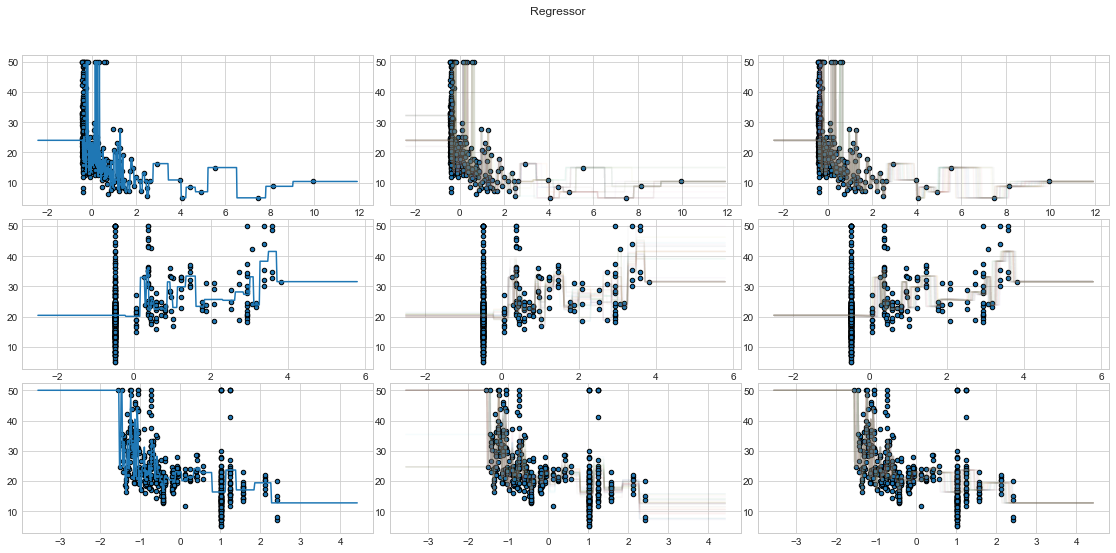

In [71]:
plt.figure(figsize=(16, 8))
plot_idx = 1
for pair in (0, 1, 2):
    
    for model in models:
        
        X = boston.data[:, pair]
        y = boston.target
        
        
        idx = np.arange(X.shape[0])
        np.random.seed(Random_seed)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]
        
        mean = X.mean(axis=0)
        std = X.std(axis=0)
        X = (X - mean) / std
        
        model.fit(X.reshape(-1, 1), y)
        
        model_title = str(type(model)).split(".")[-1][-2][:-len('regressor')]
        
        plt.subplot(3, 3, plot_idx)
        if plot_idx <= len(models):
            plt.title(model_title, fontsize=9)
            
        x_min, x_max = X.min()-1, X.max()+1
        y_min, y_max = X.min()-1, X.max()+1
        
        xx, yy = np.arange(x_min-1, x_max+1, plot_step), np.arange(y_min-1, y_max+1, plot_step)
        
        if isinstance(model, DecisionTreeRegressor):
            Z = model.predict(xx.reshape(-1, 1))
            cs = plt.plot(xx, Z)
            
        else:
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                Z = tree.predict(xx.reshape(-1, 1))
                cs = plt.plot(xx, Z, alpha=estimator_alpha)
                
            
        plt.scatter(X, y, edgecolors='k', s=20)
        plot_idx += 1
        

plt.suptitle('Regressor', fontsize=12)
plt.axis('tight')
plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5)

plt.show()           

## AdaBoost

* 대표적인 부스팅 알고리즘
* 일련의 약한 모델들을 학습
* 수정된 버전의 데이터를 반복 학습 (가중치가 적용된)
* 가중치 투표(또는 합)을 통해 각 모델의 예측 값을 결합
* 첫 단계에서는 원본 데이터를 학습하고 연속적인 반복마다 개별 샘플에 대한 가중치가 수정되고 다시 모델이 학습
  * 잘못 예측된 샘플은 가중치 증가, 올바르게 예측된 샘플은 가중치 감소
  * 각각의 약한 모델들은 예측하기 어려운 샘플에 집중하게 됨

![AdaBoost](https://scikit-learn.org/stable/_images/sphx_glr_plot_adaboost_hastie_10_2_0011.png)

In [72]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor

### AdaBoost 분류

In [73]:
model = make_pipeline(\
                      StandardScaler(),
                      AdaBoostClassifier())

In [74]:
cross_val = cross_validate(
                           estimator = model,
                           X=iris.data, y=iris.target,
                           cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.04761395454406738 (+/- 0.005394634073103769)
avg score time: 0.004801368713378907 (+/- 0.0003995184505112177)
avg test score: 0.9466666666666667 (+/- 0.03399346342395189)


In [75]:
cross_val = cross_validate(
                           estimator = model,
                           X=wine.data, y=wine.target,
                           cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.053210783004760745 (+/- 0.003970559817608652)
avg score time: 0.004803085327148437 (+/- 0.0004010010725014715)
avg test score: 0.8085714285714285 (+/- 0.16822356718459935)


In [76]:
cross_val = cross_validate(
                           estimator = model,
                           X=cancer.data, y=cancer.target,
                           cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.10062732696533203 (+/- 0.0057452196638998225)
avg score time: 0.004999732971191407 (+/- 2.229436822426025e-06)
avg test score: 0.9701133364384411 (+/- 0.019709915473893072)


### AdaBoost 회귀

In [77]:
model = make_pipeline(\
                      StandardScaler(),
                      AdaBoostRegressor())

In [78]:
cross_val = cross_validate(
                           estimator = model,
                           X=boston.data, y=boston.target,
                           cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.06361188888549804 (+/- 0.00338554563858091)
avg score time: 0.003006649017333984 (+/- 8.034953727642201e-06)
avg test score: 0.5985744583807469 (+/- 0.20937548598257683)


In [79]:
cross_val = cross_validate(
                           estimator = model,
                           X=diabetes.data, y=diabetes.target,
                           cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.06261825561523438 (+/- 0.014735047724851964)
avg score time: 0.003000307083129883 (+/- 0.0010953658155337111)
avg test score: 0.41312084500745616 (+/- 0.04091835944493939)


## Gradient Tree Boosting

* 임의의 차별화 가능한 손실함수로 일반화한 부스팅 알고리즘
* 웹 검색, 분류 및 회귀 등 다양한 분야에서 모두 사용 가능

In [80]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

### Gradient Tree Boosting 분류

In [81]:
model = make_pipeline(\
                      StandardScaler(),
                      GradientBoostingClassifier())

In [82]:
cross_val = cross_validate(
                           estimator = model,
                           X=iris.data, y=iris.target,
                           cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.129226016998291 (+/- 0.002395596105343511)
avg score time: 0.0008016586303710938 (+/- 0.0004008378523290251)
avg test score: 0.9666666666666668 (+/- 0.02108185106778919)


In [83]:
cross_val = cross_validate(
                           estimator = model,
                           X=wine.data, y=wine.target,
                           cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.20504403114318848 (+/- 0.012856465990582254)
avg score time: 0.0008024215698242187 (+/- 0.0004012381281601627)
avg test score: 0.9330158730158731 (+/- 0.04127777701479872)


In [84]:
cross_val = cross_validate(
                           estimator = model,
                           X=cancer.data, y=cancer.target,
                           cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.2747157573699951 (+/- 0.007273154182009405)
avg score time: 0.000396728515625 (+/- 0.0004859232450924652)
avg test score: 0.9596180717279925 (+/- 0.02453263202329889)


### Gradient Tree Boosting 회귀

In [85]:
model = make_pipeline(\
                      StandardScaler(),
                      GradientBoostingRegressor())

In [86]:
cross_val = cross_validate(
                           estimator = model,
                           X=boston.data, y=boston.target,
                           cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.07441587448120117 (+/- 0.00048758942517451704)
avg score time: 0.0004004955291748047 (+/- 0.0004905051292965881)
avg test score: 0.6752372690883461 (+/- 0.16121836382662494)


In [87]:
cross_val = cross_validate(
                           estimator = model,
                           X=diabetes.data, y=diabetes.target,
                           cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.058812856674194336 (+/- 0.0014653395410411103)
avg score time: 0.0006110191345214844 (+/- 0.0004992481266300843)
avg test score: 0.4029450867301339 (+/- 0.0688801507855847)


## 투표 기반 분류 (Voting Classifier)

* 서로 다른 모델들의 결과를 투표를 통해 결합
* 두가지 방법으로 투표 가능
  * 가장 많이 예측된 클래스를 정답으로 채택 (hard voting)
  * 예측된 확률의 가중치 평균 (soft voting)

In [88]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

In [89]:
model1 = SVC()
model2 = GaussianNB()
model3 = RandomForestClassifier()
vote_model = VotingClassifier(\
                              estimators=[('svc', model1), 
                                          ('naive', model2), 
                                          ('forest', model3)],
                              voting='hard')

In [90]:
for model in (model1, model2, model3, vote_model):
    model_name = str(type(model)).split('.')[-1][:-2]
    scores = cross_val_score(model, iris.data, iris.target, cv=5)
    print('Accuracy: %0.2f (+/- %0.2f) [%s]' % (scores.mean(), scores.std(), model_name))


Accuracy: 0.97 (+/- 0.02) [SVC]
Accuracy: 0.95 (+/- 0.03) [GaussianNB]
Accuracy: 0.97 (+/- 0.02) [RandomForestClassifier]
Accuracy: 0.97 (+/- 0.02) [VotingClassifier]


In [91]:
model1 = SVC(probability=True)
model2 = GaussianNB()
model3 = RandomForestClassifier()
vote_model = VotingClassifier(\
                              estimators=[('svc', model1), 
                                          ('naive', model2), 
                                          ('forest', model3)],
                              voting='soft',
                              weights=[2, 1, 2])

In [92]:
for model in (model1, model2, model3, vote_model):
    model_name = str(type(model)).split('.')[-1][:-2]
    scores = cross_val_score(model, iris.data, iris.target, cv=5)
    print('Accuracy: %0.2f (+/- %0.2f) [%s]' % (scores.mean(), scores.std(), model_name))


Accuracy: 0.97 (+/- 0.02) [SVC]
Accuracy: 0.95 (+/- 0.03) [GaussianNB]
Accuracy: 0.95 (+/- 0.03) [RandomForestClassifier]
Accuracy: 0.96 (+/- 0.02) [VotingClassifier]


### 결정 경계 시각화

In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from itertools import product

In [94]:
X = iris.data[:, [0, 2]]
y = iris.target

In [95]:
model1 = DecisionTreeClassifier(max_depth=4)
model2 = KNeighborsClassifier(n_neighbors=7)
model3 = SVC(gamma=.1, kernel='rbf', probability=True)
vote_model = VotingClassifier(estimators=[('dt', model1),
                                          ('knn', model2),
                                          ('svc', model3)],
                               voting='soft', weights=[2, 1, 2])


model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
vote_model = model1.fit(X, y)

In [96]:
x_min, x_max = X[:, 0].min() -1, X[:, 0].max() +1
y_min, y_max = X[:, 1].min() -1, X[:, 1].max() +1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

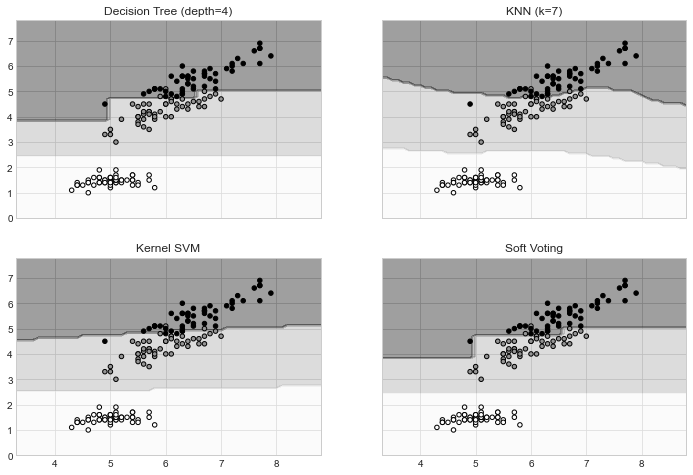

In [97]:
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(12, 8))

for idx, model, tt in zip(product([0, 1], [0, 1]), 
                          [model1, model2, model3, vote_model],
                          ['Decision Tree (depth=4)', 'KNN (k=7)', 
                           'Kernel SVM', 'Soft Voting']):
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)
    
plt.show()

## 투표 기반 회귀 (Voting Regressor)

* 서로 다른 모델의 예측 값의 평균을 사용

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

In [99]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = RandomForestRegressor()
vote_model = VotingRegressor(\
                             estimators=[('lenear', model1),
                                         ('gbr', model2),
                                         ('rfr', model3)],
                             weights=[1, 1, 1])


In [100]:
for model in (model1, model2, model3, vote_model):
    model_name = str(type(model)).split('.')[-1][:-2]
    scores = cross_val_score(model, boston.data, boston.target, cv=5)
    print('R2: %0.2f (+/- %0.2f) [%s]' % (scores.mean(), scores.std(), model_name))
    

R2: 0.35 (+/- 0.38) [LinearRegression]
R2: 0.68 (+/- 0.15) [GradientBoostingRegressor]
R2: 0.63 (+/- 0.20) [RandomForestRegressor]
R2: 0.66 (+/- 0.20) [VotingRegressor]


### 회귀식 시각화

In [101]:
X = boston.data[:, 0].reshape(-1, 1)
y = boston.target

In [102]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = RandomForestRegressor()
vote_model = VotingRegressor(\
                             estimators=[('lenear', model1),
                                         ('gbr', model2),
                                         ('rfr', model3)],
                             weights=[1, 1, 1])

model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
vote_model = vote_model.fit(X, y)

In [103]:
x_min, x_max = X.min() -1, X.max() + 1
xx = np.arange(x_min, x_max, 0.1)

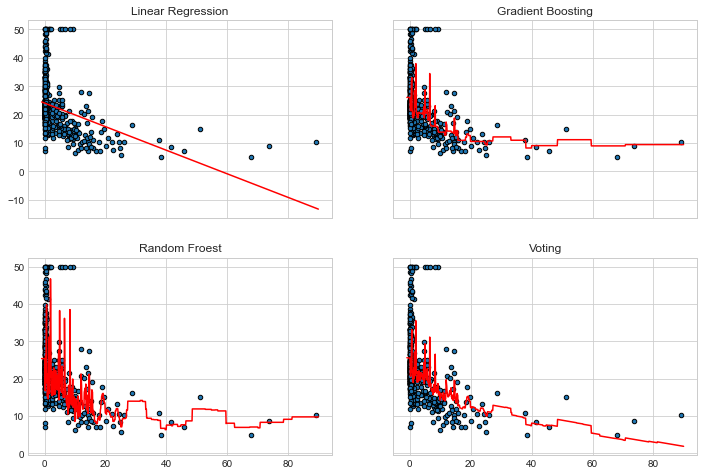

In [104]:
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(12, 8))

for idx, model, tt in zip(product([0, 1], [0, 1]),
                          [model1, model2, model3, vote_model],
                          ['Linear Regression', 'Gradient Boosting', 
                           'Random Froest', 'Voting']):
    Z = model.predict(xx.reshape(-1, 1))
    
    axarr[idx[0], idx[1]].plot(xx, Z, c='r')
    axarr[idx[0], idx[1]].scatter(X, y, s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)
    
plt.show()

## 스택 일반화 (Stacked Generalization)

* 각 모델의 예측 값을 최종 모델의 입력으로 사용
* 모델의 편향을 줄이는데 효과적

### 스택 회귀

In [105]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

In [106]:
estimators = [('ridge', Ridge()),
              ('lasso', Lasso()),
              ('svr', SVR())]


In [107]:
reg = make_pipeline(\
                    StandardScaler(),
                    StackingRegressor(
                    estimators=estimators,
                    final_estimator=GradientBoostingRegressor())
                   )

In [108]:
cross_val = cross_validate(
                           estimator = reg,
                           X=boston.data, y=boston.target,
                           cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.07501935958862305 (+/- 0.002610894773804508)
avg score time: 0.001401519775390625 (+/- 0.0004896102222414748)
avg test score: 0.3221374234265916 (+/- 0.3308376271669867)


#### 회귀식 시각화

In [109]:
X = boston.data[:, 0].reshape(-1, 1)
y = boston.target

In [110]:
model1 = Ridge()
model2 = Lasso()
model3 = SVR()
reg =  StackingRegressor(
            estimators=estimators,
            final_estimator=GradientBoostingRegressor()
                        )


model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
reg = reg.fit(X, y)

In [111]:
x_min, x_max = X.min() -1, X.max() + 1
xx = np.arange(x_min, x_max, 0.1)

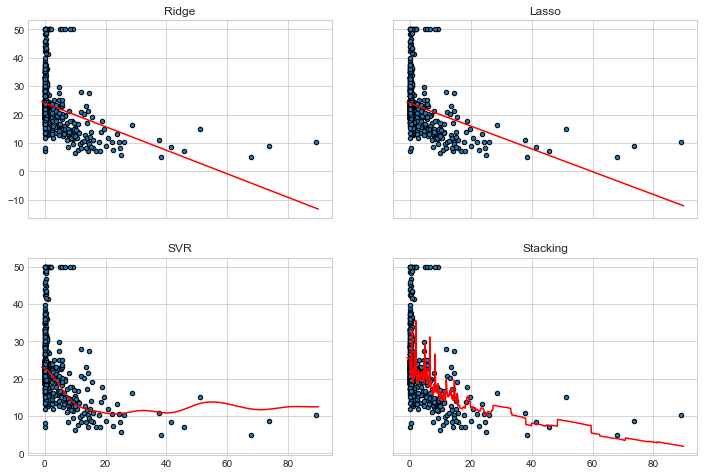

In [112]:
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(12, 8))

for idx, model, tt in zip(product([0, 1], [0, 1]),
                          [model1, model2, model3, vote_model],
                          ['Ridge', 'Lasso', 
                           'SVR', 'Stacking']):
    Z = model.predict(xx.reshape(-1, 1))
    
    axarr[idx[0], idx[1]].plot(xx, Z, c='r')
    axarr[idx[0], idx[1]].scatter(X, y, s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)
    
plt.show()

### 스택 분류

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

In [114]:
estimators = [('logistic', LogisticRegression(max_iter=10000)),
              ('svc', SVC()),
              ('naive', GaussianNB())]

In [115]:
clf = StackingClassifier(\
                        estimators=estimators,
                        final_estimator=RandomForestClassifier()
                        )

In [116]:
cross_val = cross_validate(
                           estimator = clf,
                           X=iris.data, y=iris.target,
                           cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.2568563938140869 (+/- 0.02792957976066822)
avg score time: 0.006801700592041016 (+/- 0.0007489272413257116)
avg test score: 0.9666666666666666 (+/- 0.02108185106778919)


#### 결정 경계 시각화

In [117]:
X = iris.data[:, [0, 2]]
y = iris.target

In [119]:
estimators = [('logistic',LogisticRegression(max_iter=10000) ),
              ('svc', SVC()),
              ('naive', GaussianNB())]

model1 = LogisticRegression(max_iter=10000)
model2 = SVC()
model3 = GaussianNB()
stack = StackingClassifier(
            estimators=estimators,
            final_estimator=RandomForestClassifier())



model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
stack = stack.fit(X, y)

In [120]:
x_min, x_max = X[:, 0].min() -1, X[:, 0].max() +1
y_min, y_max = X[:, 1].min() -1, X[:, 1].max() +1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

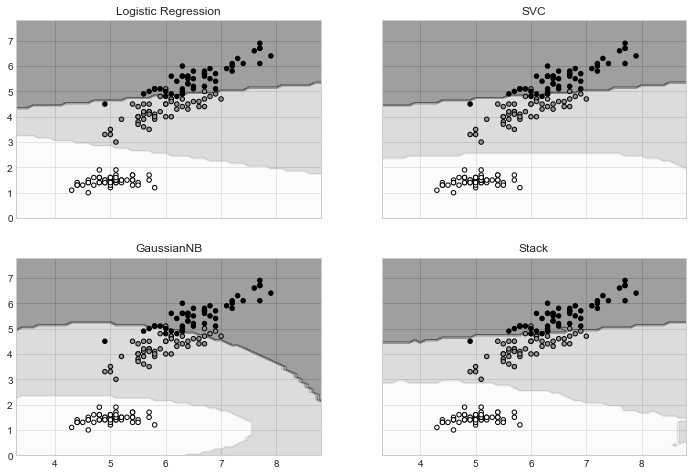

In [121]:
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(12, 8))

for idx, model, tt in zip(product([0, 1], [0, 1]), 
                          [model1, model2, model3, stack],
                          ['Logistic Regression', 'SVC', 
                           'GaussianNB', 'Stack']):
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)
    
plt.show()